## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [5]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 13s 269us/step - loss: 2.2878 - acc: 0.1203 - val_loss: 2.2406 - val_acc: 0.1588
Epoch 2/500
50000/50000 [==============================] - 13s 260us/step - loss: 2.2132 - acc: 0.1875 - val_loss: 2.1842 - val_acc: 0.2089
Epoch 3/500
50000/50000 [==============================] - 13s 264us/step - loss: 2.1583 - acc: 0.2324 - val_loss: 2.1341 - val_acc: 0.2398
Epoch 4/500
50000/50000 [==============================] - 13s 260us/step - loss: 2.1126 - acc: 0.2578 - val_loss: 2.0938 - val_acc: 0.2676
Epoch 5/500
50000/50000 [==============================] - 13s 268us/step - loss: 2.0747 - acc: 0.2768 - val_loss: 2.0591 - val_acc: 0.2779
Epoch 6/500
50000/50000 [==============================] - 14s 282us/step - loss: 2.0421 - acc: 0.2882 - val_loss: 2.0281 - val_acc: 0.2909
Epoch 7/500
50000/50000 [==============================] - 19s

50000/50000 [==============================] - 13s 263us/step - loss: 1.6653 - acc: 0.4173 - val_loss: 1.6733 - val_acc: 0.4121
Epoch 58/500
50000/50000 [==============================] - 13s 261us/step - loss: 1.6623 - acc: 0.4188 - val_loss: 1.6705 - val_acc: 0.4150
Epoch 59/500
50000/50000 [==============================] - 13s 264us/step - loss: 1.6594 - acc: 0.4196 - val_loss: 1.6683 - val_acc: 0.4141
Epoch 60/500
50000/50000 [==============================] - 13s 268us/step - loss: 1.6565 - acc: 0.4207 - val_loss: 1.6647 - val_acc: 0.4151
Epoch 61/500
50000/50000 [==============================] - 14s 275us/step - loss: 1.6535 - acc: 0.4223 - val_loss: 1.6625 - val_acc: 0.4141
Epoch 62/500
50000/50000 [==============================] - 14s 288us/step - loss: 1.6507 - acc: 0.4223 - val_loss: 1.6589 - val_acc: 0.4135
Epoch 63/500
50000/50000 [==============================] - 14s 271us/step - loss: 1.6479 - acc: 0.4244 - val_loss: 1.6571 - val_acc: 0.4175
Epoch 64/500
50000/50000 [

50000/50000 [==============================] - 13s 254us/step - loss: 1.5307 - acc: 0.4669 - val_loss: 1.5589 - val_acc: 0.4548
Epoch 116/500
50000/50000 [==============================] - 12s 250us/step - loss: 1.5291 - acc: 0.4678 - val_loss: 1.5522 - val_acc: 0.4490
Epoch 117/500
50000/50000 [==============================] - 12s 235us/step - loss: 1.5270 - acc: 0.4673 - val_loss: 1.5507 - val_acc: 0.4532
Epoch 118/500
50000/50000 [==============================] - 12s 237us/step - loss: 1.5256 - acc: 0.4688 - val_loss: 1.5527 - val_acc: 0.4505
Epoch 119/500
50000/50000 [==============================] - 12s 232us/step - loss: 1.5231 - acc: 0.4697 - val_loss: 1.5478 - val_acc: 0.4539
Epoch 120/500
50000/50000 [==============================] - 12s 232us/step - loss: 1.5216 - acc: 0.4710 - val_loss: 1.5485 - val_acc: 0.4526
Epoch 121/500
50000/50000 [==============================] - 12s 235us/step - loss: 1.5198 - acc: 0.4716 - val_loss: 1.5473 - val_acc: 0.4537
Epoch 122/500
50000/

50000/50000 [==============================] - 15s 305us/step - loss: 1.4373 - acc: 0.5000 - val_loss: 1.4901 - val_acc: 0.4775
Epoch 173/500
50000/50000 [==============================] - 15s 293us/step - loss: 1.4357 - acc: 0.4997 - val_loss: 1.4893 - val_acc: 0.4747
Epoch 174/500
50000/50000 [==============================] - 14s 280us/step - loss: 1.4342 - acc: 0.5001 - val_loss: 1.4840 - val_acc: 0.4753
Epoch 175/500
50000/50000 [==============================] - 19s 378us/step - loss: 1.4327 - acc: 0.4998 - val_loss: 1.4798 - val_acc: 0.4785
Epoch 176/500
50000/50000 [==============================] - 14s 275us/step - loss: 1.4310 - acc: 0.5008 - val_loss: 1.4804 - val_acc: 0.4770
Epoch 177/500
50000/50000 [==============================] - 13s 264us/step - loss: 1.4295 - acc: 0.5027 - val_loss: 1.4842 - val_acc: 0.4757
Epoch 178/500
50000/50000 [==============================] - 14s 286us/step - loss: 1.4281 - acc: 0.5006 - val_loss: 1.4824 - val_acc: 0.4736
Epoch 179/500
50000/

Epoch 230/500
50000/50000 [==============================] - 12s 235us/step - loss: 1.3578 - acc: 0.5242 - val_loss: 1.4451 - val_acc: 0.4904
Epoch 231/500
50000/50000 [==============================] - 12s 232us/step - loss: 1.3561 - acc: 0.5246 - val_loss: 1.4384 - val_acc: 0.4891
Epoch 232/500
50000/50000 [==============================] - 12s 232us/step - loss: 1.3549 - acc: 0.5257 - val_loss: 1.4413 - val_acc: 0.4875
Epoch 233/500
50000/50000 [==============================] - 12s 231us/step - loss: 1.3540 - acc: 0.5256 - val_loss: 1.4310 - val_acc: 0.4919
Epoch 234/500
50000/50000 [==============================] - 12s 231us/step - loss: 1.3528 - acc: 0.5259 - val_loss: 1.4394 - val_acc: 0.4881
Epoch 235/500
50000/50000 [==============================] - 12s 233us/step - loss: 1.3512 - acc: 0.5276 - val_loss: 1.4345 - val_acc: 0.4919
Epoch 236/500
50000/50000 [==============================] - 12s 233us/step - loss: 1.3504 - acc: 0.5274 - val_loss: 1.4342 - val_acc: 0.4924
Epoch 

Epoch 288/500
50000/50000 [==============================] - 14s 280us/step - loss: 1.2883 - acc: 0.5500 - val_loss: 1.3964 - val_acc: 0.5045
Epoch 289/500
50000/50000 [==============================] - 12s 243us/step - loss: 1.2864 - acc: 0.5504 - val_loss: 1.4342 - val_acc: 0.4920
Epoch 290/500
50000/50000 [==============================] - 12s 234us/step - loss: 1.2852 - acc: 0.5509 - val_loss: 1.3973 - val_acc: 0.5047
Epoch 291/500
50000/50000 [==============================] - 12s 238us/step - loss: 1.2840 - acc: 0.5508 - val_loss: 1.3991 - val_acc: 0.5011
Epoch 292/500
50000/50000 [==============================] - 12s 246us/step - loss: 1.2828 - acc: 0.5512 - val_loss: 1.3913 - val_acc: 0.5057
Epoch 293/500
50000/50000 [==============================] - 12s 235us/step - loss: 1.2808 - acc: 0.5525 - val_loss: 1.4014 - val_acc: 0.5020
Epoch 294/500
50000/50000 [==============================] - 12s 244us/step - loss: 1.2804 - acc: 0.5526 - val_loss: 1.3953 - val_acc: 0.5028
Epoch 

Epoch 346/500
50000/50000 [==============================] - 12s 232us/step - loss: 1.2216 - acc: 0.5746 - val_loss: 1.3712 - val_acc: 0.5129
Epoch 347/500
50000/50000 [==============================] - 12s 232us/step - loss: 1.2211 - acc: 0.5746 - val_loss: 1.3919 - val_acc: 0.5083
Epoch 348/500
50000/50000 [==============================] - 11s 230us/step - loss: 1.2205 - acc: 0.5738 - val_loss: 1.3780 - val_acc: 0.5094
Epoch 349/500
50000/50000 [==============================] - 11s 230us/step - loss: 1.2195 - acc: 0.5753 - val_loss: 1.3865 - val_acc: 0.5111
Epoch 350/500
50000/50000 [==============================] - 12s 232us/step - loss: 1.2189 - acc: 0.5746 - val_loss: 1.3705 - val_acc: 0.5123
Epoch 351/500
50000/50000 [==============================] - 12s 231us/step - loss: 1.2177 - acc: 0.5764 - val_loss: 1.3763 - val_acc: 0.5118
Epoch 352/500
50000/50000 [==============================] - 12s 233us/step - loss: 1.2162 - acc: 0.5758 - val_loss: 1.3740 - val_acc: 0.5139
Epoch 

Epoch 404/500
50000/50000 [==============================] - 11s 230us/step - loss: 1.1619 - acc: 0.5956 - val_loss: 1.3540 - val_acc: 0.5217
Epoch 405/500
50000/50000 [==============================] - 11s 230us/step - loss: 1.1605 - acc: 0.5965 - val_loss: 1.3546 - val_acc: 0.5242
Epoch 406/500
50000/50000 [==============================] - 11s 230us/step - loss: 1.1596 - acc: 0.5950 - val_loss: 1.3752 - val_acc: 0.5150
Epoch 407/500
50000/50000 [==============================] - 12s 230us/step - loss: 1.1587 - acc: 0.5951 - val_loss: 1.3704 - val_acc: 0.5118
Epoch 408/500
50000/50000 [==============================] - 12s 231us/step - loss: 1.1576 - acc: 0.5965 - val_loss: 1.3556 - val_acc: 0.5166
Epoch 409/500
50000/50000 [==============================] - 11s 230us/step - loss: 1.1560 - acc: 0.5982 - val_loss: 1.3758 - val_acc: 0.5134
Epoch 410/500
50000/50000 [==============================] - 11s 229us/step - loss: 1.1548 - acc: 0.5982 - val_loss: 1.3649 - val_acc: 0.5188
Epoch 

Epoch 462/500
50000/50000 [==============================] - 13s 259us/step - loss: 1.1018 - acc: 0.6163 - val_loss: 1.3511 - val_acc: 0.5228
Epoch 463/500
50000/50000 [==============================] - 13s 261us/step - loss: 1.1020 - acc: 0.6157 - val_loss: 1.4050 - val_acc: 0.5098
Epoch 464/500
50000/50000 [==============================] - 13s 253us/step - loss: 1.1005 - acc: 0.6164 - val_loss: 1.3472 - val_acc: 0.5249
Epoch 465/500
50000/50000 [==============================] - 12s 247us/step - loss: 1.0994 - acc: 0.6178 - val_loss: 1.3629 - val_acc: 0.5239
Epoch 466/500
50000/50000 [==============================] - 13s 259us/step - loss: 1.0994 - acc: 0.6167 - val_loss: 1.3673 - val_acc: 0.5211
Epoch 467/500
50000/50000 [==============================] - 13s 251us/step - loss: 1.0975 - acc: 0.6205 - val_loss: 1.3851 - val_acc: 0.5162
Epoch 468/500
50000/50000 [==============================] - 12s 246us/step - loss: 1.0947 - acc: 0.6186 - val_loss: 1.3802 - val_acc: 0.5155
Epoch 

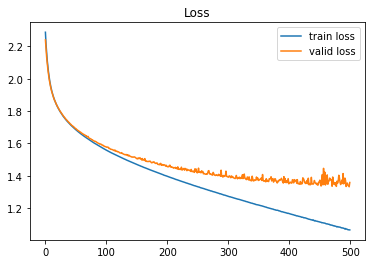

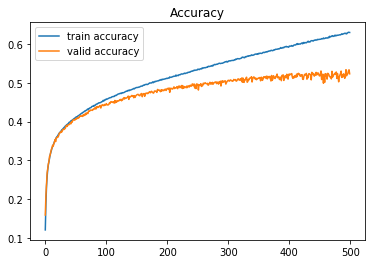

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()